In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from tqdm.notebook import tqdm

In [8]:
import gymnasium as gym
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper, FullyObsWrapper

env = gym.make('MiniGrid-Empty-16x16-v0', render_mode='rgb_array')
# env = RGBImgPartialObsWrapper(env) # Get pixel observations
# env = ImgObsWrapper(env) # Get rid of the 'mission' field
# env = FullyObsWrapper(env)
obs, _ = env.reset() # This now produces an RGB tensor only

In [7]:
env.env.env

In [45]:
obs.keys()

dict_keys(['image', 'direction', 'mission'])

0
get to the green goal square


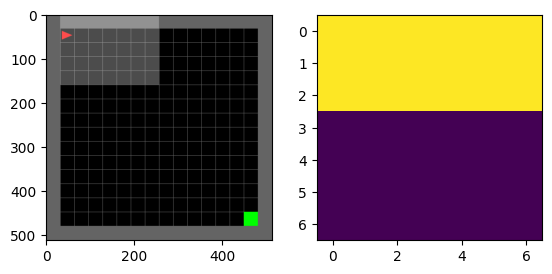

In [46]:
print(obs['direction'])
print(obs['mission'])
plt.subplot(121); plt.imshow(env.render())
plt.subplot(122); plt.imshow(obs['image'][..., 0])
plt.show()

In [ ]:
# def get_state(obs):
    # return 

In [89]:
env.env.env.env.agent_pos = (3, 4)

In [90]:
env.agent_dir = 2

In [91]:
env.agent_pos

(3, 4)

In [145]:
class State():
    def __init__(self, env, obs):
        self.img = obs['image'][..., 0]
        self.agent_pos = env.agent_pos
        self.agent_dir = env.agent_dir
        

def get_state(env, obs):
    return obs['image'][..., 0], env.agent_pos, env.agent_dir

def goto_state(env, state):
    image, pos, d = state
    env.env.env.env.agent_pos = pos
    env.env.env.env.agent_dir = d

env.env.env.env
env = gym.make('MiniGrid-Empty-8x8-v0', render_mode='rgb_array')
env = FullyObsWrapper(env)
obs, _ = env.reset()
s = get_state(env, obs)
archive = [s]
for i in tqdm(range(1000)):
    obs, _ = env.reset()
    state = archive[np.random.choice(len(archive))]
    goto_state(env, state)
    for i in range(3):
        obs, reward, done, info, _ = env.step(np.random.choice(3))
    state = get_state(env, obs)
    archive.append(state)



  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
import goexplore

In [7]:
from torch import nn

In [59]:
def get_base_env(env):
    return get_base_env(env.env) if hasattr(env, 'env') else env

class MyMiniGrid(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.env = env
        
    def step(self, action):
        obs, reward, done, _, info = self.env.step(action)
        state_sim = self.get_current_state_sim()
        return state_sim, obs, reward, done, info
    
    def get_current_state_sim(self):
        return (self.env.agent_pos, self.env.agent_dir)
    
    def goto_state_sim(self, state):
        obs, _ = self.env.reset()
        p, d = state
        get_base_env(env).agent_pos = p
        get_base_env(env).agent_dir = d
    
env = gym.make('MiniGrid-Empty-16x16-v0', render_mode='rgb_array')
# env = FullyObsWrapper(env)
# env = MyMiniGrid(env)
obs, _ = env.reset()


In [50]:
a = env.step(1)

In [58]:
a[4]

{}

In [31]:
env.get_current_state_sim()

((1, 1), 0)

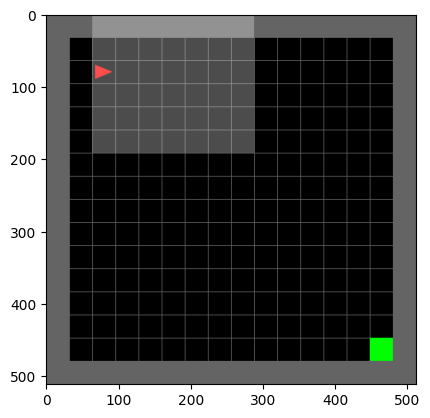

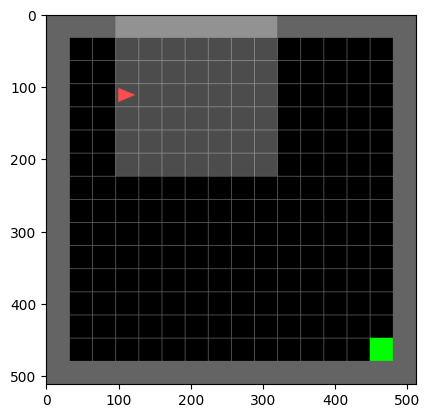

In [41]:
plt.imshow(env.render())
plt.show()

env.goto_state_sim(((3, 3), 0))

plt.imshow(env.render())
plt.show()

In [6]:
class MiniGridStateObs2Latent():
    def __init__(self, goexplore):
        self.goexplore = goexplore
    
    def get_latent(self, state_sim, obs):
        (x, y), d = state_sim
        
        nn.functional.one_hot(torch.tensor(0), 4)
        return np.array([state_sim[0]])
    
class RandomExplorer():
    def __init__(self, goexplore):
        self.goexplore = goexplore
        
    def get_action(self, state_sim, obs, latent):
        # return self.env.action_space.sample()
        return np.random.choice(3)
    
class MinigridEnv():
    def __init__(self):
        pass
    

In [ ]:
# every k iterations of BFS:

# sample a random batch of nodes from the tree
# compute their latents based on the current state2latent mapping
# compute how novel each latent state is
# compute productivities for node in the batch

# Run SGD with minibatches on the transitions from the trajectories weighted by the productivity of traj


In [7]:
env = gym.make('MiniGrid-Empty-16x16-v0', render_mode='rgb_array')
env = FullyObsWrapper(env)
ge = goexplore.GoExplore(env, goexplore.CountNodeSelector, MiniGridStateObs2Latent, RandomExplorer, n_exploration_steps=3)

In [8]:
for i in tqdm(range(500)):
    ge.run_iteration()
    
    # if i%20==0:
    #     dirs = 0.2*np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
    #     pos = np.array([node.state_sim[0] for node in ge.archive.nodes])
    #     d = np.array([node.state_sim[1] for node in ge.archive.nodes])
    #     x = pos+dirs[d]
    #     plt.xlim(0, 16); plt.ylim(0, 16)
    #     plt.scatter(*x.T)
    #     plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
ge.archive.n_successes, ge.archive.n_fails

(221, 279)

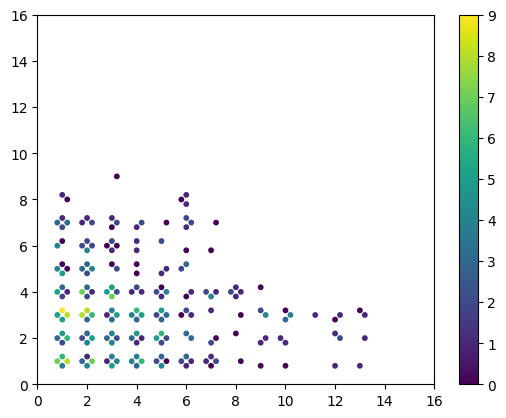

In [10]:
dirs = 0.2*np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
pos = np.array([node.state_sim[0] for node in ge.archive.nodes])
d = np.array([node.state_sim[1] for node in ge.archive.nodes])
visits = np.array([node.n_visits for node in ge.archive.nodes])
x = pos+dirs[d]
plt.xlim(0, 16); plt.ylim(0, 16)
plt.scatter(*x.T, c=visits, s=10.)
plt.colorbar(); plt.show()

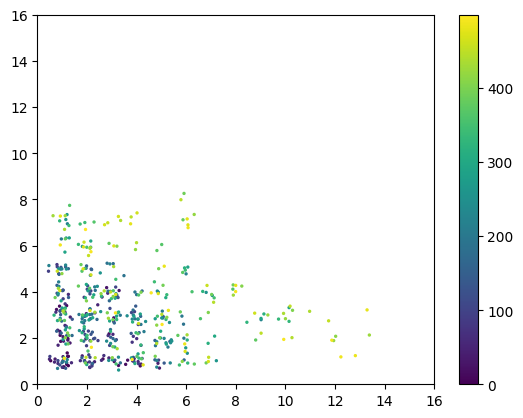

In [11]:
selected = np.array(ge.selected)
x = selected+np.random.randn(*selected.shape)*.2
plt.scatter(*x.T, c=np.arange(len(selected)), s=2)
plt.xlim(0, 16); plt.ylim(0, 16)
plt.colorbar(); plt.show()

In [12]:
len(ge.archive.nodes)

183

In [14]:
pos.shape

(183, 2)

In [16]:
import sklearn, sklearn.mixture
sklearn.mixture.GaussianMixture

sklearn.mixture._gaussian_mixture.GaussianMixture

(0.0, 16.0)

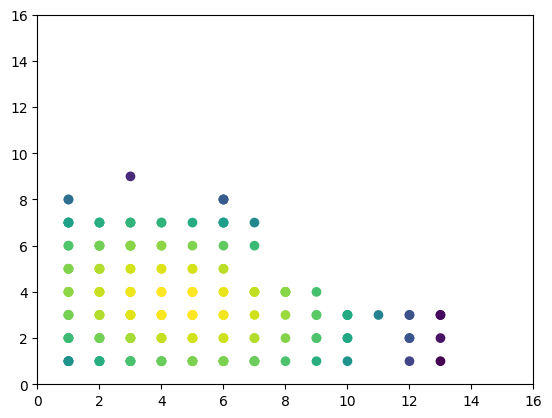

In [23]:
gm = sklearn.mixture.GaussianMixture(n_components=1, random_state=0).fit(pos)
gm.weights_, gm.means_, gm.covariances_
plt.scatter(*pos.T, c=gm.score_samples(pos))
plt.xlim(0, 16); plt.ylim(0, 16)

In [40]:
[node.traj for node in ge.archive.nodes]
# [node.get_full_trajectory() for node in ge.archive.nodes]

[[],
 [(((1, 1), 0), 0, 0), (((1, 1), 3), 0, 0), (((1, 1), 2), 0, 0)],
 [(((1, 1), 1), 0, 0), (((1, 1), 0), 1, 0), (((1, 1), 1), 2, 0)],
 [(((1, 1), 0), 0, 0), (((1, 1), 3), 2, 0), (((1, 1), 3), 0, 0)],
 [(((1, 2), 1), 2, 0), (((1, 3), 1), 2, 0), (((1, 4), 1), 2, 0)],
 [(((1, 5), 1), 2, 0), (((1, 6), 1), 0, 0), (((1, 6), 0), 2, 0)],
 [(((1, 1), 1), 0, 0), (((1, 1), 0), 2, 0), (((2, 1), 0), 1, 0)],
 [(((2, 6), 0), 1, 0), (((2, 6), 1), 0, 0), (((2, 6), 0), 0, 0)],
 [(((1, 5), 1), 1, 0), (((1, 5), 2), 1, 0), (((1, 5), 3), 0, 0)],
 [(((1, 2), 1), 2, 0), (((1, 3), 1), 2, 0), (((1, 4), 1), 1, 0)],
 [(((1, 5), 1), 0, 0), (((1, 5), 0), 1, 0), (((1, 5), 1), 2, 0)],
 [(((1, 6), 1), 0, 0), (((1, 6), 0), 2, 0), (((2, 6), 0), 1, 0)],
 [(((2, 6), 0), 1, 0), (((2, 6), 1), 0, 0), (((2, 6), 0), 2, 0)],
 [(((1, 1), 1), 0, 0), (((1, 1), 0), 2, 0), (((2, 1), 0), 2, 0)],
 [(((1, 5), 1), 0, 0), (((1, 5), 0), 2, 0), (((2, 5), 0), 1, 0)],
 [(((2, 6), 1), 2, 0), (((2, 7), 1), 2, 0), (((2, 8), 1), 2, 0)],
 [(((

In [165]:
from treelib import Node, Tree

tree = Tree()

tree.create_node("Harry", "harry")  # No parent means its the root node
tree.create_node("Jane",  "jane"   , parent="harry")
tree.create_node("Bill",  "bill"   , parent="harry")
tree.create_node("Diane", "diane"  , parent="jane")
tree.create_node("Mary",  "mary"   , parent="diane")
tree.create_node("Mark",  "mark"   , parent="jane")

tree.show()

Harry
├── Bill
└── Jane
    ├── Diane
    │   └── Mary
    └── Mark



In [41]:
def get_str(node):
    return f'{node.state_sim[0][0]:2d}{node.state_sim[0][1]:2d}{node.state_sim[1]:2d} - {node.depth}'


get_str(ge.archive.nodes[0])

' 1 1 0 - 0'

In [42]:
import graphviz
g = graphviz.Digraph('G', filename='graph.gv')

for node in ge.archive.nodes:
    for child in node.children:
        g.edge(get_str(node), get_str(child))
# g.edge('World', 'tf')
# g.edge('tf', 'Hello')
g.view()

'graph.gv.pdf'

Unescaped left brace in regex is deprecated, passed through in regex; marked by <-- HERE in m/%{ <-- HERE (.*?)}/ at /usr/bin/run-mailcap line 528.
Error: no "view" rule for type "application/pdf" passed its test case
       (for more information, add "--debug=1" on the command line)


application/pdf D)ownload, or C)ancel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [197]:
for node in ge.archive.nodes:
    if node.node_parent is None:
        print(node.node_parent)
    for child in node.children:
        assert child.node_parent is node

None


In [149]:
# assert all entries in archive are unique
x = np.concatenate([pos, d[:, None]], axis=-1)
assert len(ge.archive.nodes) == len(np.unique(x, axis=0))
print(len(ge.archive.nodes))

380


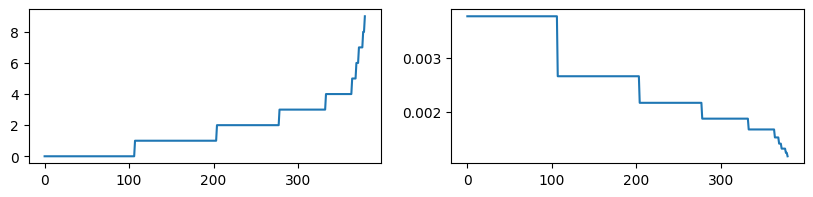

In [148]:
plt.figure(figsize=(10, 2))
plt.subplot(121); plt.plot(np.sort(visits))
p = 1/np.sqrt(np.sort(visits)+1)
p = p/p.sum()
plt.subplot(122); plt.plot(p)

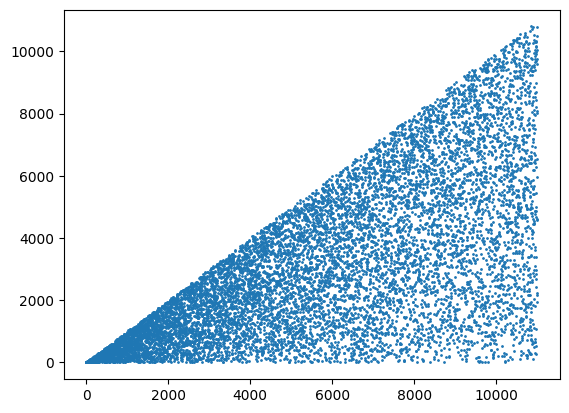

In [101]:
plt.scatter(np.arange(len(ge.selected)), ge.selected, s=1)

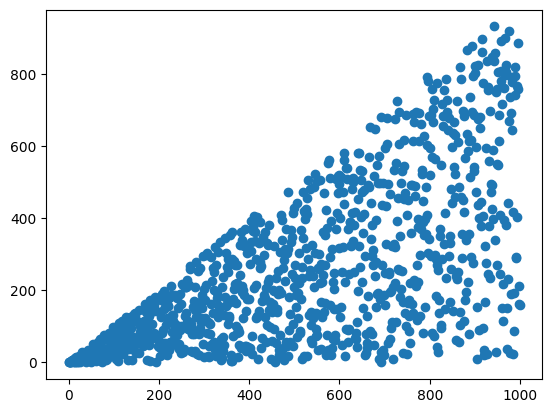

In [95]:
plt.scatter(np.arange(len(ge.selected)), ge.selected)